In [1015]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from matplotlib.ticker import MaxNLocator


In [1016]:
# Define the start and end dates for fetching the data
start_date = datetime.now() - timedelta(days=3*365)
end_date = datetime.now()


In [1017]:
# Fetch the data for Nifty50
nifty50 = yf.download('^NSEI', start=start_date, end=end_date, progress=False)
nifty50 = nifty50[['Close']]

# Calculate the daily returns for Nifty50
nifty50_returns = nifty50.pct_change().dropna()

# Fetch the data for the top 10 stocks in Nifty50
tickers = ['RELIANCE.NS', 'TCS.NS', 'HDFCBANK.NS', 'HINDUNILVR.NS', 'INFY.NS', 'KOTAKBANK.NS', 'BAJAJFINSV.NS', 'ICICIBANK.NS', 'LT.NS', 'SBIN.NS']
top10_returns = pd.DataFrame()

for ticker in tickers:
    df = yf.download(ticker, start=start_date, end=end_date, progress=False)
    df = df[['Close']]
    df[ticker] = df['Close'].pct_change()
    top10_returns = pd.concat([top10_returns, df[ticker]], axis=1)

/var/folders/73/_pyhnkr96qgd0jnrc2yy1bdr0000gn/T/ipykernel_9194/2949330940.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[ticker] = df['Close'].pct_change()
/var/folders/73/_pyhnkr96qgd0jnrc2yy1bdr0000gn/T/ipykernel_9194/2949330940.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[ticker] = df['Close'].pct_change()
/var/folders/73/_pyhnkr96qgd0jnrc2yy1bdr0000gn/T/ipykernel_9194/2949330940.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [1018]:
# Combine the data for Nifty50 returns and the top 10 stock returns into a single dataframe
data = pd.concat([nifty50_returns, top10_returns], axis=1)

In [1019]:
# Check for null values and drop them
data.isnull().sum()
data = data.dropna()


In [1020]:
# Split the data into training and test sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
X = train_data.drop('Close', axis = 1)
Y = train_data['Close']
data.head()

,Close,RELIANCE.NS,TCS.NS,HDFCBANK.NS,HINDUNILVR.NS,INFY.NS,KOTAKBANK.NS,BAJAJFINSV.NS,ICICIBANK.NS,LT.NS,SBIN.NS
2020-04-16 00:00:00,0.007563,0.015828,-0.011008,0.019055,-0.020683,-0.023785,-0.036550,0.021852,0.044753,0.035789,0.033726
2020-04-17 00:00:00,0.030463,0.047900,0.052533,0.034726,-0.020976,0.007854,0.048990,0.063857,0.098099,0.023309,0.025199
2020-04-20 00:00:00,-0.000529,0.016177,0.006893,0.037955,-0.020314,0.039046,-0.007165,-0.023491,-0.037944,-0.018544,-0.003881
2020-04-21 00:00:00,-0.030275,-0.005186,-0.044539,-0.024554,-0.008196,-0.030767,-0.040416,-0.058825,-0.081511,-0.049421,-0.040260
2020-04-22 00:00:00,0.022919,0.102033,0.018329,0.007541,0.029667,0.013661,0.019466,0.039325,0.012355,-0.020394,0.021380


In [1021]:
print(data.corr())

                  Close  RELIANCE.NS    TCS.NS  HDFCBANK.NS  HINDUNILVR.NS  \
Close          1.000000     0.601955  0.540743     0.748871       0.377598   
RELIANCE.NS    0.601955     1.000000  0.282854     0.338966       0.177851   
TCS.NS         0.540743     0.282854  1.000000     0.277331       0.230796   
HDFCBANK.NS    0.748871     0.338966  0.277331     1.000000       0.200675   
HINDUNILVR.NS  0.377598     0.177851  0.230796     0.200675       1.000000   
INFY.NS        0.565406     0.249531  0.694364     0.309794       0.210654   
KOTAKBANK.NS   0.645387     0.275727  0.208260     0.576536       0.250161   
BAJAJFINSV.NS  0.663585     0.322420  0.262286     0.455242       0.215821   
ICICIBANK.NS   0.743755     0.290193  0.232587     0.624474       0.179377   
LT.NS          0.656185     0.269610  0.264342     0.470077       0.219079   
SBIN.NS        0.689969     0.312087  0.188824     0.514785       0.155422   

                INFY.NS  KOTAKBANK.NS  BAJAJFINSV.NS  ICICIBANK

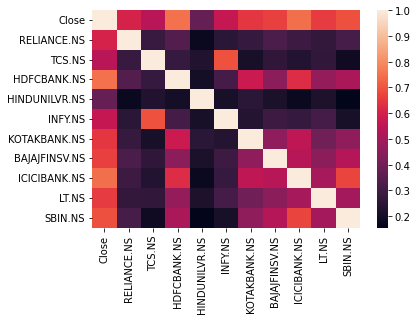

In [1022]:
sns.heatmap(data.corr())
plt.show()

In [1023]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [1024]:
# Perform PCA with n components
n = 4
pca = PCA(n_components=n)
X_pca = pca.fit_transform(X_scaled)


In [1025]:
# Get the principal component loadings
df_comp = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(n)], index=X.columns)
print(df_comp)

                    PC1       PC2       PC3       PC4
RELIANCE.NS   -0.242010 -0.090708 -0.208995 -0.928886
TCS.NS        -0.247577 -0.627598  0.221593  0.037271
HDFCBANK.NS   -0.372489  0.154323  0.101505  0.056991
HINDUNILVR.NS -0.179090 -0.236115 -0.897887  0.257908
INFY.NS       -0.275530 -0.575300  0.252532  0.108989
KOTAKBANK.NS  -0.341266  0.157043 -0.080421  0.131639
BAJAJFINSV.NS -0.349014  0.109188  0.041013 -0.054964
ICICIBANK.NS  -0.392201  0.242359  0.116867  0.103706
LT.NS         -0.336120  0.089364 -0.023324  0.151753
SBIN.NS       -0.358229  0.289911  0.067739  0.001964


In [1026]:
# Get the principal component scores
X_scores = pca.transform(X_scaled)
X_pca = sm.add_constant(X_scores)
model = sm.OLS(Y, X_pca).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     2867.
Date:                Fri, 14 Apr 2023   Prob (F-statistic):               0.00
Time:                        13:10:30   Log-Likelihood:                 2751.4
No. Observations:                 596   AIC:                            -5493.
Df Residuals:                     591   BIC:                            -5471.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0007   9.84e-05      7.178      0.000       0.001       0.001
x1            -0.0050   4.72e-05   -106.300      0.000      -0.005      -0.005
x2            -0.0006   8.36e-05     -7.089      0.000      -0.001      -0.000
x3            -0.0003      0.000     -2.852      0.004      -0.001    -9.3e-05
x4            -0.0012      0.000    -10.464      0.000      -0.001      -0.001
==============================================================================
Omnibus:                       19.025   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.296
Skew:                          -0.017   Prob(JB):                     3.97e-10
Kurtosis:                       4.320   Cond. No.                         2.34
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1027]:
# Scale the test_data without the constant term
test_data_scaled = scaler.transform(test_data.drop('Close', axis=1))

# Perform PCA transformation on the scaled test_data
test_data_pca = pca.transform(test_data_scaled)


test_data_scores = pd.DataFrame(test_data_pca, columns=[f'PC{i+1}' for i in range(n)], index=test_data.index)

# Add a constant term to the test_data principal component scores
test_data_pca_const = sm.add_constant(test_data_scores)

In [1028]:
# Make predictions on the test_data set
Y_pred = model.predict(test_data_pca_const)

In [1029]:
# Make predictions on the train_data set
Y_train_pred = model.predict(X_pca)

In [1030]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [1031]:
# Evaluate the model on train_data
mse_train = mean_squared_error(Y, Y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(Y, Y_train_pred)
mae_train = mean_absolute_error(Y, Y_train_pred)
mape_train = mean_absolute_percentage_error(Y, Y_train_pred)

print("Train Data Metrics:")
print("MSE:", mse_train)
print("RMSE:", rmse_train)
print("R-squared:", r2_train)
print("MAE:", mae_train)
print("MAPE:", mape_train)
print("\n")

# Evaluate the model on test_data
mse_test = mean_squared_error(test_data['Close'], Y_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(test_data['Close'], Y_pred)
mae_test = mean_absolute_error(test_data['Close'], Y_pred)
mape_test = mean_absolute_percentage_error(test_data['Close'], Y_pred)

print("Test Data Metrics:")
print("MSE:", mse_test)
print("RMSE:", rmse_test)
print("R-squared:", r2_test)
print("MAE:", mae_test)
print("MAPE:", mape_test)

Train Data Metrics:
MSE: 5.725254128250406e-06
RMSE: 0.0023927503271863543
R-squared: 0.9509894154057158
MAE: 0.0018035715014122753
MAPE: 138.87762547810743


Test Data Metrics:
MSE: 5.3300795113415295e-06
RMSE: 0.002308696496151352
R-squared: 0.9486497680335211
MAE: 0.0017156198214136535
MAPE: 89.21622800502261


Train Data Metrics:
MSE: 5.725254128250407e-06
RMSE: 0.0023927503271863547
R-squared: 0.9509894154057158
MAE: 0.0018035715014122753
MAPE: 138.87762547810757


Test Data Metrics:
MSE: 5.330079511341532e-06
RMSE: 0.0023086964961513525
R-squared: 0.9486497680335211
MAE: 0.0017156198214136542
MAPE: 89.2162280050227  

Directional Accuracy (Train Data): 94.12751677852349
Directional Accuracy (Test Data): 91.94630872483222

Got these results. Csn you give me content for some 8 slides to summarize this project and findings. Also have a slide on why I selected the 10 stocks I did in the initial slide content. Give insights and thoughts on results in this.

In [1032]:
def directional_accuracy(y_true, y_pred):
    return np.mean(np.sign(y_true) == np.sign(y_pred)) * 100

dir_acc_train = directional_accuracy(Y, Y_train_pred)
dir_acc_test = directional_accuracy(test_data['Close'], Y_pred)

print("Directional Accuracy (Train Data):", dir_acc_train)
print("Directional Accuracy (Test Data):", dir_acc_test)

Directional Accuracy (Train Data): 94.12751677852349
Directional Accuracy (Test Data): 91.94630872483222


In [1035]:
# Sort the test_data by index (dates)
test_data_sorted = test_data.sort_index()
Y_pred_sorted = pd.Series(Y_pred, index=test_data.index).sort_index()

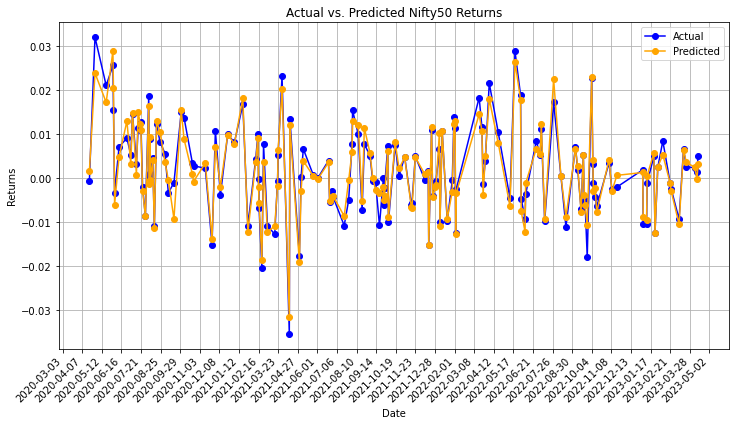

In [1036]:
plt.figure(figsize=(12, 6))

# Plot the actual values
plt.plot(test_data_sorted.index, test_data_sorted['Close'], label='Actual', linestyle='-', marker='o', color='blue')

# Plot the predicted values
plt.plot(test_data_sorted.index, Y_pred_sorted, label='Predicted', linestyle='-', marker='o', color='orange')

# Set plot title and axis labels
plt.title('Actual vs. Predicted Nifty50 Returns')
plt.xlabel('Date')
plt.ylabel('Returns')

# Format the x-axis to show the dates in a readable format and set the interval
date_format = mdates.DateFormatter('%Y-%m-%d')
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=5))  # Set interval to display a date every 2 weeks

# Set the x-axis tick labels to be slanting
plt.xticks(rotation=45, ha='right')

# Set legend and plot grid
plt.legend()
plt.grid()

# Show the plot
plt.show()

In [1034]:
import yfinance as yf

# set the ticker symbol for Nifty50
ticker = "^NSEI"

# fetch the historical data for the last 4 years
data = yf.download(ticker, start=start_date, end=end_date)

# calculate the difference between the open and close values
diff = abs(data['Close'].pct_change().dropna())

# calculate the average of the difference values
avg_diff = diff.mean()

# print the result
print("Average % increase/decrease in daily returns for past 3 years: ", avg_diff)


[*********************100%***********************]  1 of 1 completed
Average % increase/decrease in daily returns for past 3 years:  0.00805700294500684
